# Exploratory Data Analysis

## Boxplots

Boxplots offer a good visual summary when the data is large: they combine graphical EDA with numerical EDA & summary statistics (median, percentiles and outliers). For small datasets, swarm plots are usually enough.

_Reminder: the median is the 50th percentile of the data._


## Empirical Cumulative Distribution Function (ECDF)

The ECDF can handle complex cases in ways that other plots might not: it shows all the data and gives a complete picture of how the data is distributed. The X-axis represents the quantity you are measuring (petal lenght in the example below), while the Y-axis is the fraction of data points that have a value smaller than the corresponding X-value.

_Note: ECDF also show percentiles, although in a less compact form than boxplots._


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import datasets

sns.set()

In [6]:
# For a sorted array of size n,
# there are k values smaller than
# the kth element, or a fraction
# of k / n elements.
# This means that y = [1/n, ... k/n, ..., 1].

def ecdf(data):
    """
    returns X and Y arrays 
    for the ECDF of a 1D array of measuremetns.
    """
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n   # 1/n to 1 in equally spaced increments
    
    return x, y


In [4]:
# load & format iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# petal lenghts of each species
setosa_petal_length = iris_df.loc[iris_df['species'] == 'setosa', 'petal length (cm)'].to_numpy()
versicolor_petal_length = iris_df.loc[iris_df['species'] == 'versicolor', 'petal length (cm)'].to_numpy()
virginica_petal_length = iris_df.loc[iris_df['species'] == 'virginica', 'petal length (cm)'].to_numpy()


## Comparing several visual summaries

The example below shows several ways of describing the distribution of petal lengths for the iris versicolor sample (50 observations):
+ histograms and KDEs.
+ boxplots & ECDF.

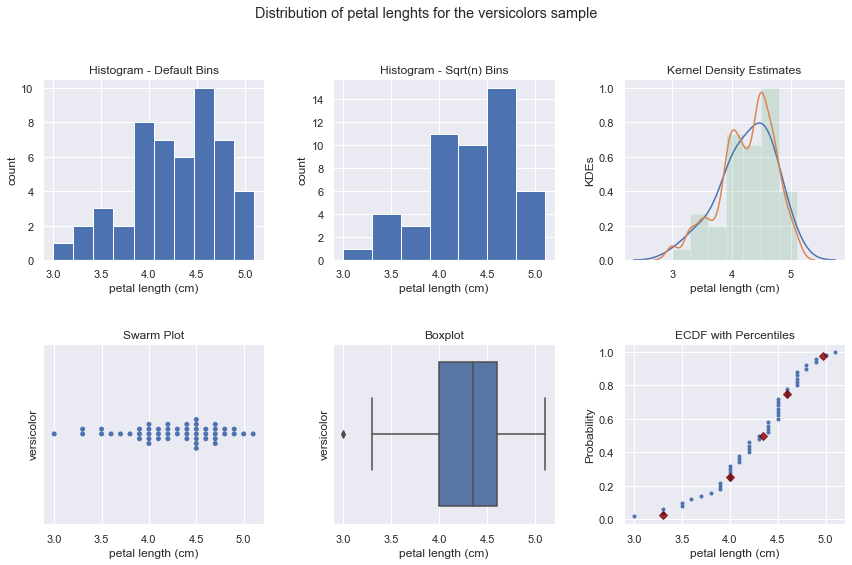

In [5]:
# fig
fig, [[ax00, ax01, ax02], [ax10, ax11, ax12]] = plt.subplots(nrows=2, ncols=3, figsize = (3 * 4, 2 * 4))

# paramters
len_vers = len(versicolor_petal_length)
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Plot histograms, swarmplot & boxplot
_ = ax00.hist(versicolor_petal_length)
_ = ax01.hist(versicolor_petal_length, bins=int(np.sqrt(len_vers)))
_ = sns.swarmplot(y='species', x='petal length (cm)', data=iris_df.loc[iris_df['species'] == 'versicolor'], ax=ax10)
_ = sns.boxplot(y='species', x='petal length (cm)', data=iris_df.loc[iris_df['species'] == 'versicolor'], ax=ax11)

# kde with several smoothing bandwidths
_ = sns.kdeplot(versicolor_petal_length, ax=ax02)
_ = sns.kdeplot(versicolor_petal_length, bw=.1, ax=ax02)
_ = ax02.hist(versicolor_petal_length, bins=int(np.sqrt(len_vers)), alpha=0.2, normed=True)

# ecdf with percentiles
x_vers, y_vers = ecdf(versicolor_petal_length)
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)
_ = ax12.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = ax12.plot(ptiles_vers, percentiles/100, marker='D', color='maroon', linestyle='none', alpha=0.8)

# Label axes
for ax in (ax00, ax01, ax02, ax12):
    _ = ax.set_xlabel("petal length (cm)")
    _ = ax.set_ylabel('count')

for ax in (ax10, ax11):
    _ = ax.set_yticks([])
    _ = ax.set_ylabel('versicolor', rotation=90)

_ = ax02.set_ylabel('KDEs')
_ = ax12.set_ylabel('Probability')

# titles
_ = ax00.set_title('Histogram - Default Bins')
_ = ax01.set_title('Histogram - Sqrt(n) Bins')
_ = ax02.set_title('Kernel Density Estimates')
_ = ax10.set_title('Swarm Plot')
_ = ax11.set_title('Boxplot')
_ = ax12.set_title('ECDF with Percentiles')

_ = fig.suptitle('Distribution of petal lenghts for the versicolors sample')

plt.tight_layout(rect=[0, 0, 1, 0.9], h_pad=3, w_pad=2.5)


## Comparing several distributions

Boxplots and ECDFs can also be used to compare two or more distributions. The example below expose clear differences among the species. Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.

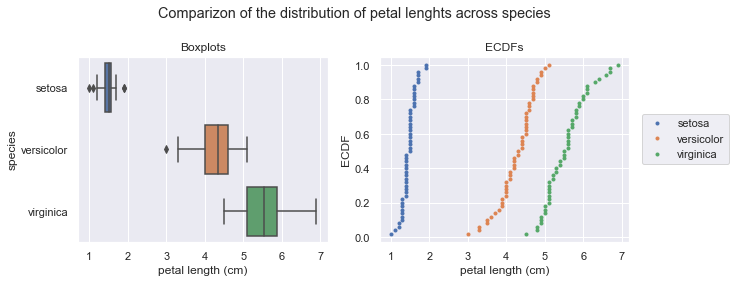

In [75]:
# fig
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 *5, 1 * 4))

# boxplots
_ = sns.boxplot(y='species', x='petal length (cm)', data=iris_df, ax=ax1)

# compared ecdfs
x_seto, y_seto = ecdf(setosa_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)
_ = ax2.plot(x_seto, y_seto, marker='.', linestyle='none', label='setosa')
_ = ax2.plot(x_vers, y_vers, marker='.', linestyle='none', label='versicolor')
_ = ax2.plot(x_virg, y_virg, marker='.', linestyle='none', label='virginica')

# labels
_ = ax2.set_xlabel('petal length (cm)')
_ = ax2.set_ylabel('ECDF')

# titles
_ = ax1.set_title('Boxplots')
_ = ax2.set_title('ECDFs')

fig.suptitle('Comparizon of the distribution of petal lenghts across species')

# legend
handles, labels = ax2.get_legend_handles_labels()

plt.tight_layout(rect=[0, 0, 0.9, 0.9])
_ = fig.legend(handles, labels, loc='right', bbox_to_anchor=(1.02, 0.5))


## Summary Statistics

Histograms, swarm plots and ECDFs are provide effective summaries of data. But sometimes, we need to summarize the data even more succinctly, say in one or two numbers. The most common one for continuous data are the mean or the median.

+ mean, based on the values of the data, is heavily influenced by outliers.
+ median, based on the ranking of the values, is immune to outliers.

The spread of data is measured by the standard deviation from the mean.


In [87]:
print('median: {:0.2} - mean: {:0.2} - std: {:0.2}'.format(np.median(versicolor_petal_length), np.mean(versicolor_petal_length), np.std(versicolor_petal_length)))

median: 4.3 - mean: 4.3 - std: 0.47


# Approximate Data with Common Distributions

## Normal Distribution

The Normal Distribution describes a continuous variable whose PDF is symetrical and has a single peak. It has two parameters:
+ The mean describes where the center of the peak is. 
+ The standard deviation describes how wide the peak is, or how spread out the data are.

The smaller the standard deviation, the more vertical the CDF slope around the median (which is equal to the mean).

_Note: most statistical methods assume the data is roughly normal. This assumption must always be checked first: many things that you might assume are normally distributed are actually not. In particular, outliers are extremely unlikely for normally distributed data; if your data does have extreme values, the normal distribution might not be the best description._

_Note: We can compare the ECDF to the theoritical CDF of the normal distribution with same mean and standard deviation to assess if the data is normally distributed._


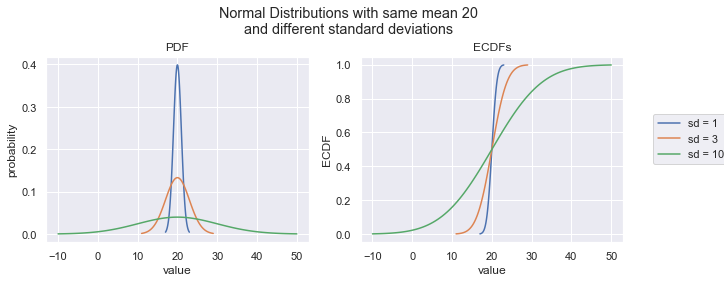

In [13]:
# fig
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))

for sigma in [1, 3, 10]:

    x = np.linspace(20 - 3*sigma, 20 + 3*sigma, 100)
    _ = ax1.plot(x, stats.norm.pdf(x, 20, sigma))
    _ = ax2.plot(x, stats.norm.cdf(x, 20, sigma))

    # alternative: hacker statistics
    # sample = np.random.normal(loc=20, scale=sigma, size=10000)
    # _ = ax1.hist(sample, bins=100, normed=True, histtype='step')
    # x, y = ecdf(sample)
    # _ = ax2.plot(x, y, marker='.', linestyle='none')

# labels
_ = ax1.set_xlabel('value')
_ = ax1.set_ylabel('probability')
_ = ax2.set_xlabel('value')
_ = ax2.set_ylabel('ECDF')

# titles
_ = ax1.set_title('PDF')
_ = ax2.set_title('ECDFs')

fig.suptitle('Normal Distributions with same mean 20\nand different standard deviations')

plt.tight_layout(rect=[0, 0, 0.9, 0.9])
_ = fig.legend(('sd = 1', 'sd = 3', 'sd = 10'), loc='right', bbox_to_anchor=(1.02, 0.5))


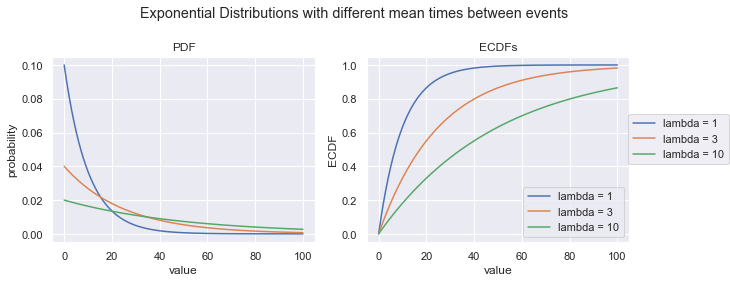

In [15]:
# fig
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))

for rate in [10, 25, 50]:

    x = np.linspace(0, 100, 100)
    _ = ax1.plot(x, stats.expon.pdf(x, scale = rate))
    _ = ax2.plot(x, stats.expon.cdf(x, scale = rate))

    # alternative: hacker statistics
    # sample = np.random.normal(loc=20, scale=sigma, size=10000)
    # _ = ax1.hist(sample, bins=100, normed=True, histtype='step')
    # x, y = ecdf(sample)
    # _ = ax2.plot(x, y, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('lambda = 1', 'lambda = 3', 'lambda = 10'), loc='lower right')


# labels
_ = ax1.set_xlabel('value')
_ = ax1.set_ylabel('probability')
_ = ax2.set_xlabel('value')
_ = ax2.set_ylabel('ECDF')

# titles
_ = ax1.set_title('PDF')
_ = ax2.set_title('ECDFs')

fig.suptitle('Exponential Distributions with different mean times between events')

plt.tight_layout(rect=[0, 0, 0.9, 0.9])
_ = fig.legend(('lambda = 1', 'lambda = 3', 'lambda = 10'), loc='right', bbox_to_anchor=(1.02, 0.5))


## Normal Distribution Example - Belmont Stakes

The data has been scraped from the [Belmont Wikipedia page](https://en.wikipedia.org/wiki/Belmont_Stakes).
+ Secretariat ran the fastest Belmont Stakes in history in 1973. 
+ While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. 

We remove these two outliers from the data set to compute the mean and standard deviation of the Belmont winners' times. The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.


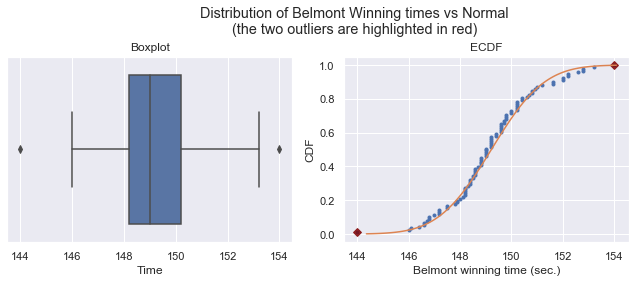

In [9]:
# load df
belmont_df = pd.read_csv('../../../data/belmont_stakes.csv')
belmont_no_outliers = belmont_df.loc[belmont_df['IsOutlier'] == 0, 'Time']
belmont_outliers = belmont_df.loc[belmont_df['IsOutlier'] == 1, 'Time'].sort_values()

# ecdf
x, y = ecdf(belmont_df['Time'])

# Compute mean and standard deviation without the outliers: mu, sigma
mu = belmont_no_outliers.mean()
sigma = belmont_no_outliers.std()
x_theor = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y_theor = stats.norm.cdf(x_theor, mu, sigma)

# Plot the CDFs and show the plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))

_ = sns.boxplot(x=belmont_df['Time'], ax=ax1)
_ = ax2.plot(x, y, marker='.', linestyle='none')
_ = ax2.plot(belmont_outliers, y[[0, -1]], marker='D', color='maroon', linestyle='none', alpha=0.8)
_ = ax2.plot(x_theor, y_theor)

# labels
_ = ax2.set_xlabel('Belmont winning time (sec.)')
_ = ax2.set_ylabel('CDF')

# titles
_ = ax1.set_title('Boxplot')
_ = ax2.set_title('ECDF')

fig.suptitle('Distribution of Belmont Winning times vs Normal\n(the two outliers are highlighted in red)')

plt.tight_layout(rect=[0, 0, 0.9, 0.9])


If we assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat is very small: 0.06%.

_Note: the probability is so low that we need to take a million samples to be sure we get this value from the normal distribution at least once, when using hackers statistics._

## Exponential Distribution

The number of random events per unit of time can be described by a Poisson distribution. The amount of time between random events of a Poisson process follow an Exponential distribution. It has a single parameter: the mean waiting time.


In [15]:
secretariat = belmont_df.loc[belmont_df['Winner'] == 'Secretariat', 'Time'].values[0]
prob = stats.norm(mu, sigma).cdf(144)

# alternative: hacker statistics
# sample = np.random.normal(loc=mu, scale=sigma, size=1000000)
# prob = np.sum(sample <= secretariat) / 1000000

print('Probability of besting Secretariat: {:.2%}'.format(prob))


Probability of besting Secretariat: 0.063%
